# High-energy LB phase transitions

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

## MoS2-0

In [3]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_phonons = np.load(ppath)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61, 1521, 3)
Number of modes: 61


In [11]:
# Find indices of LB modes, manually
LB2_idxs = np.zeros(ntheta).astype(int)
LB2_idxs[24:] = 23
LB2_idxs[:24] = 35

LB3_idxs = np.zeros(ntheta).astype(int)
LB3_idxs[57:] = 27
LB3_idxs[24:57] = 29
LB3_idxs[:24] = 41

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_idxs.npy', LB2_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_idxs.npy', LB3_idxs)

In [ ]:
# Import the indices and extract the modes
M2_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy')
M2_S_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_idxs.npy')

M2_LB1_max = np.zeros(M2_ntheta)
M2_LB1_min = np.zeros(M2_ntheta)
M2_LB1_mean = np.zeros(M2_ntheta)
M2_LB1_max_z = np.zeros(M2_ntheta)
M2_LB1_min_z = np.zeros(M2_ntheta)
M2_LB1_mean_z = np.zeros(M2_ntheta)
M2_S_max = np.zeros(M2_ntheta)
M2_S_min = np.zeros(M2_ntheta)
M2_S_mean = np.zeros(M2_ntheta)

for i in range(M2_ntheta):
    M2_LB1_max[i] = M2_max_umag[i, M2_LB1_idxs[i]]
    M2_LB1_min[i] = M2_min_umag[i, M2_LB1_idxs[i]]
    M2_LB1_mean[i] = M2_mean_umag[i, M2_LB1_idxs[i]]
    M2_LB1_max_z[i] = M2_max_uz[i, M2_LB1_idxs[i]]
    M2_LB1_min_z[i] = M2_min_uz[i, M2_LB1_idxs[i]]
    M2_LB1_mean_z[i] = M2_mean_uz[i, M2_LB1_idxs[i]]
    
    M2_S_max[i] = M2_max_umag[i, M2_S_idxs[i]]
    M2_S_min[i] = M2_min_umag[i, M2_S_idxs[i]]
    M2_S_mean[i] = M2_mean_umag[i, M2_S_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max.npy', M2_LB1_max)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_min.npy', M2_LB1_min)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean.npy', M2_LB1_mean)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max_z.npy', M2_LB1_max_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_min_z.npy', M2_LB1_min_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean_z.npy', M2_LB1_mean_z)

In [12]:
# Extract the mode list from the indices
LB2_modes = np.zeros(ntheta)
LB3_modes = np.zeros(ntheta)

for i in range(ntheta):
    LB2_modes[i] = dataset[i, LB2_idxs[i]]
    LB3_modes[i] = dataset[i, LB3_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_modes.npy', LB2_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_modes.npy', LB3_modes)

IndexError: index 35 is out of bounds for axis 1 with size 35

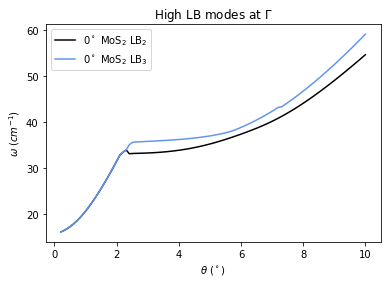

In [9]:
# Plot LB modes
plt.plot(thetas[2:], LB2_modes[2:], c='k', label=r'$0^\circ$ MoS$_2$ LB$_2$')
plt.plot(thetas[2:], LB3_modes[2:], c='cornflowerblue', label=r'$0^\circ$ MoS$_2$ LB$_3$')
plt.title(f"High LB modes at " + log_name)
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.legend()

# plt.savefig("/Users/jonathanlu/Documents/tvMoS2/theta/data/transition.pdf")
plt.show()